# Contents

> Import libraries and data

> Data security review

> Create a 'Region' column

> Cross Region variable with the spending flag

> Insights: customer behavior in different geographic areas

> Create an exclusion flag for low-activity customers

> Export data excluding 'low activity' customers

> Create customer profile

> Bar chart shows the distribution of customer profiles

> Aggregate  max, mean, and min on a customer-profile level for usage frequency and expenditure.

> Customer profile insights

> Visualisations to compare customer profiles with regions and departments.

> Top 3 departments by customer profile

> Most popular day to shop by customer profile

> How often users return to Instacart categorised by loyalty 

> Insights: how often users return to Instacart categorised by loyalty 


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [2]:
path=r'/Users/vanessalimsingh/Instacart Basket Analysis 07-05-2024'

In [3]:
df_fix=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_4-10.pkl'))

In [4]:
df_fix['prices'].max()

25.0

In [5]:
df_fix.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,Dependants,Status,income,Full Name,merge_indicator,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both,dairy eggs
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both,snacks
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both,snacks
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Female,Alabama,31,2/17/2019,3,married,40423,Linda Nguyen,both,household


# Security Implications:
> The 'Full Name' column falls under PII data as it allows us to trace that back to an individual. 

In [6]:
df_fix.drop(columns=['Full Name'], inplace=True)

In [7]:
#display all columns
pd.set_option('display.max_columns', None)

In [8]:
df_fix.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag,Gender,State,Age,date_joined,Dependants,Status,income,merge_indicator,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,dairy eggs
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,snacks
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,snacks
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,household


# Create a “Region” column based on the “State” column to compare customer behavior in different geographic areas

In [9]:
#Defining regions. Region 1
state_to_region = {
    'Maine': 'Region 1',
    'New Hampshire': 'Region 1',
    'Vermont': 'Region 1',
    'Massachusetts': 'Region 1',
    'Rhode Island': 'Region 1',
    'Connecticut': 'Region 1',
    'New York': 'Region 1',
    'New Jersey': 'Region 1',
    'Pennsylvania': 'Region 1'
}

In [10]:
#region 2
state_to_region.update({
    
'Wisconsin': 'Region 2',
'Michigan': 'Region 2',
'Illinois': 'Region 2',
'Indiana': 'Region 2',
'Ohio': 'Region 2',
'North Dakota': 'Region 2',
'South Dakota': 'Region 2',
'Nebraska': 'Region 2',
'Kansas': 'Region 2',
'Minnesota': 'Region 2',
'Iowa': 'Region 2',
'Missouri': 'Region 2'})


In [11]:
#region 3
state_to_region.update({

'Delaware': 'Region 3',
'Maryland': 'Region 3',
'District of Columbia': 'Region 3',
'Virginia': 'Region 3',
'West Virginia': 'Region 3',
'North Carolina': 'Region 3',
'South Carolina': 'Region 3',
'Georgia': 'Region 3',
'Florida': 'Region 3',
'Kentucky': 'Region 3',
'Tennessee': 'Region 3',
'Mississippi': 'Region 3',
'Alabama': 'Region 3',
'Oklahoma': 'Region 3',
'Texas': 'Region 3',
'Arkansas': 'Region 3',
'Louisiana': 'Region 3'})

In [12]:
#region 4
state_to_region.update({
    'Idaho': 'Region 4',
    'Montana': 'Region 4',
    'Wyoming': 'Region 4',
    'Nevada': 'Region 4',
    'Utah': 'Region 4',
    'Colorado': 'Region 4',
    'Arizona': 'Region 4',
    'New Mexico': 'Region 4',
    'Alaska': 'Region 4',
    'Washington': 'Region 4',
    'Oregon': 'Region 4',
    'California': 'Region 4',
    'Hawaii': 'Region 4'})

In [13]:
df_fix['region'] = df_fix['State'].map(state_to_region)

In [14]:
df_fix.tail()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag,Gender,State,Age,date_joined,Dependants,Status,income,merge_indicator,department,region
32404854,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,9,9,5.6,Mid-range product,Busiest days,Most orders,13,Regular customer,7.058915,low_spender,22.0,Non_Freq_customer,Female,Iowa,74,9/14/2019,3,married,137969,both,dry goods pasta,Region 2
32404855,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,3,19,5.9,Mid-range product,Busiest days,Most orders,13,Regular customer,7.058915,low_spender,22.0,Non_Freq_customer,Female,Iowa,74,9/14/2019,3,married,137969,both,snacks,Region 2
32404856,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,3,19,4.2,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,low_spender,22.0,Non_Freq_customer,Female,Iowa,74,9/14/2019,3,married,137969,both,snacks,Region 2
32404857,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,3,19,4.9,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,low_spender,22.0,Non_Freq_customer,Female,Iowa,74,9/14/2019,3,married,137969,both,snacks,Region 2
32404858,2977660,206209,13,1,12,7.0,22920,9,0,Roasted & Salted Shelled Pistachios,117,19,1.7,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,low_spender,22.0,Non_Freq_customer,Female,Iowa,74,9/14/2019,3,married,137969,both,snacks,Region 2


In [15]:
#Checking if any row does not have region data
df_fix['region'].isnull().sum()

0

# Cross Region variable with the spending flag to determine spending habits across regions

In [16]:
crosstab_Region_Spend = pd.crosstab(df_fix['region'], df_fix['spend_flag'], dropna = False)

In [17]:
crosstab_Region_Spend

spend_flag,high_spender,low_spender
region,,
Region 1,108225,5614511
Region 2,155975,7441350
Region 3,209691,10582194
Region 4,160354,8132559


In [18]:
crosstab_Region_Spend['Row Sums'] = crosstab_Region_Spend.sum(axis=1)

In [19]:
crosstab_Region_Spend

spend_flag,high_spender,low_spender,Row Sums
region,,,
Region 1,108225,5614511,5722736
Region 2,155975,7441350,7597325
Region 3,209691,10582194,10791885
Region 4,160354,8132559,8292913


In [20]:
crosstab_Region_Spend.to_clipboard()
#calculation of proportion done on excel

#  Customer behavior in different geographic areas insights:
### Region 3 has the highest number of high spenders, as well as low spenders. 
### Region 1 has the lowest number of high spenders, as well as low spenders. 
### However, it should be noted that each region has a different sum of customers, therefore, it would be useful to look at the proportions. 
### When looking at proportions, high spenders across all 4 regions are 2% of the total, and low spenders are 98%. Therefore, there isn't a significant difference in spending habits across regions. 

# Create an exclusion flag for low-activity customers (customers with less than 5 orders) 

In [21]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) 
# exclude them from the data. export this sample.

In [22]:
# Create a flag for customer activity
df_fix.loc[df_fix['max_order'] < 5, 'Activity Flag'] = 'low activity'
df_fix.loc[df_fix['max_order'] >= 5, 'Activity Flag'] = 'regular activity'

In [23]:
df_fix.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag,Gender,State,Age,date_joined,Dependants,Status,income,merge_indicator,department,region,Activity Flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages,Region 3,regular activity
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,dairy eggs,Region 3,regular activity
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,snacks,Region 3,regular activity
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,snacks,Region 3,regular activity
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,household,Region 3,regular activity


In [24]:
# print the frequency of your new “flag”
df_fix['Activity Flag'].value_counts(dropna=False)

Activity Flag
regular activity    30964564
low activity         1440295
Name: count, dtype: int64

In [25]:
df_fix.shape

(32404859, 33)

In [26]:
#Exclude low activity from the data. 

In [27]:
condition = df_fix['Activity Flag'] == 'regular activity'

In [28]:
df_reg_activity = df_fix.loc[condition]

In [29]:
#checking values in the column
df_reg_activity['Activity Flag'].unique()

array(['regular activity'], dtype=object)

# Export data excluding 'low activity' customers

In [30]:
df_reg_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Merged_data_REG_activity.pkl'))

In [31]:
df_reg_activity.shape

(30964564, 33)

In [33]:
df_fix.shape

(32404859, 33)

# Create a profile variable

In [34]:
df2=df_reg_activity

In [35]:
df2['prices'].max()

25.0

In [37]:
df2['Status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

In [38]:
df2['Dependants'].unique()

array([3, 2, 0, 1])

## A profile will be created based on income, number of dependants and status. In this profile, customers will be categorised according to: Bargain finders, Luxury lovers, and Regular shoppers. 

## This could help with marketing strategies, for example targeting luxury lovers with more expensive products. 

### The criteria is:
#### Bargain finder:  living with parents and siblings, lower than average income, and 2 or more dependants.
#### Luxury lover: single or married or divorced/widowed, higher than average income, and 1 or less dependants
#### Regular shopper: Everything else will be categorised as a regular shopper that likely purchases a range of products. 

In [39]:
#find ave income
average_income = df2['income'].mean()

In [40]:
average_income

99675.86510754681

#### Setting the criteria

In [41]:
#bargain finder
df2.loc[(df2['Status'] == 'living with parents and siblings') & (df2['income']<= average_income) & (df2['Dependants']>=2) ,'Customer_Profile'] = 'bargain_finder'
#luxury lover
df2.loc[(df2['Status'].isin(['single', 'married', 'divorced/widowed'])) & (df2['income']>= average_income) & (df2['Dependants']<=2),'Customer_Profile'] = 'luxury_lover'
#regular shopper (everything else)
df2.loc[df2['Customer_Profile'].isna(), 'Customer_Profile'] = 'regular_shopper'

/var/folders/1g/ch7w9_k56pj78tjf9gzlt8zm0000gn/T/ipykernel_85387/756440044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[(df2['Status'] == 'living with parents and siblings') & (df2['income']<= average_income) & (df2['Dependants']>=2) ,'Customer_Profile'] = 'bargain_finder'


In [42]:
df2['Customer_Profile'].value_counts()

Customer_Profile
regular_shopper    19328358
luxury_lover       10696296
bargain_finder       939910
Name: count, dtype: int64

# Bar chart shows the distribution of customer profiles

Text(0.5, 1.0, 'Distribution by customer profile')

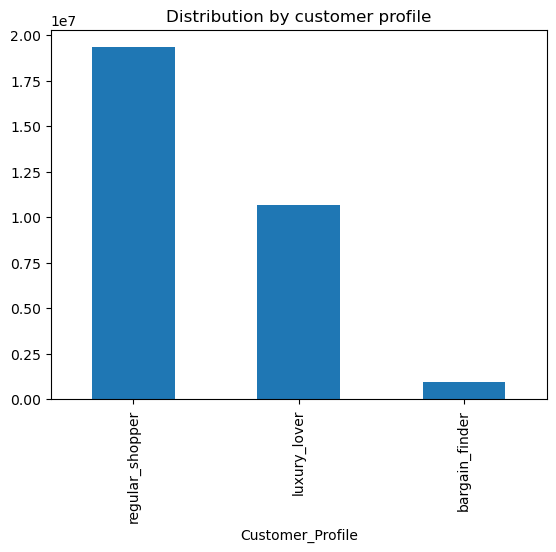

In [43]:
bar0=df2['Customer_Profile'].value_counts().plot.bar()
bar0.set_title('Distribution by customer profile')


In [44]:
bar0.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'no_of_custprofile.png'), bbox_inches='tight')


# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [45]:
#filter DF to 'regular_shopper'
regular_df = df2[df2['Customer_Profile'] == 'regular_shopper']

In [46]:
#mean of regular shopper
reg_mean=regular_df['prices'].mean()

In [47]:
#min of regular shopper
reg_min=regular_df['prices'].min()

In [48]:
#max of regular shopper
reg_max=regular_df['prices'].max()

In [49]:
#median of 'days since order'
reg_median=regular_df['days_since_prior_order'].median()

In [50]:

summary_table_reg = pd.DataFrame({
    'Statistics': ['Mean', 'Min', 'Max'],
    'Prices': [reg_mean, reg_min, reg_max]})

### Summary table of regular shopper


In [51]:
summary_table_reg

,Statistics,Prices
0,Mean,7.699694
1,Min,1.000000
2,Max,25.000000


#### Median of 'days since order' for regular_shopper


In [52]:
reg_median

7.0

In [53]:
#filter DF to 'luxury_lover'
luxury_df = df2[df2['Customer_Profile'] == 'luxury_lover']

In [54]:
luxury_mean=luxury_df['prices'].mean()

In [55]:
luxury_min=luxury_df['prices'].min()

In [56]:
luxury_max=luxury_df['prices'].max()

In [57]:
summary_table_lux = pd.DataFrame({
    'Statistics': ['Mean', 'Min', 'Max'],
    'Prices': [luxury_mean, luxury_min, luxury_max]})

#### Summary table of luxury shopper


In [58]:
summary_table_lux

,Statistics,Prices
0,Mean,7.954245
1,Min,1.000000
2,Max,25.000000


In [59]:
lux_median=luxury_df['days_since_prior_order'].median()

#### Median of 'days since order' for luxury shoppers

In [60]:
lux_median

7.0

In [61]:
#filter DF to 'bargain_finder'
bargain_df = df2[df2['Customer_Profile'] == 'bargain_finder']

In [62]:
bargain_mean=bargain_df['prices'].mean()

In [63]:
bargain_mean

7.797824016886956

In [64]:
bargain_min=bargain_df['prices'].min()

In [65]:
bargain_max=bargain_df['prices'].max()

In [66]:
bargain_median=bargain_df['days_since_prior_order'].median()

In [67]:
summary_table_bargain = pd.DataFrame({
    'Statistics': ['Mean', 'Min', 'Max'],
    'Prices': [bargain_mean, bargain_min, bargain_max]})

#### Summary table of bargain shopper


In [68]:
summary_table_bargain

,Statistics,Prices
0,Mean,7.797824
1,Min,1.000000
2,Max,25.000000


#### Median of 'days since order' for bargain shoppers

In [69]:
bargain_median

7.0

# Regular shopper insights:
#### Expenditure: the mean expenditure is 7.69, the min is 1.0 and the max is 25.00. 
#### Usage frequency: regular shoppers see a median of 7 days since prior order. 

# Luxury shopper insights:
#### Expenditure: the mean expenditure is 7.95, the min is 1.0 and the max is 25.00. 
#### Usage frequency: luxury shoppers see a median of 7 days since prior order. 

# Bargain shopper insights:
#### Expenditure: the mean expenditure is 7.79, the min is 1.0 and the max is 25.00. 
#### Usage frequency: bargain shoppers see a median of 7 days since prior order. 

# Visualisations to compare customer profiles with regions and departments.

In [69]:
groupedbar = df2.groupby(['region', 'Customer_Profile']).size().unstack(fill_value=0)

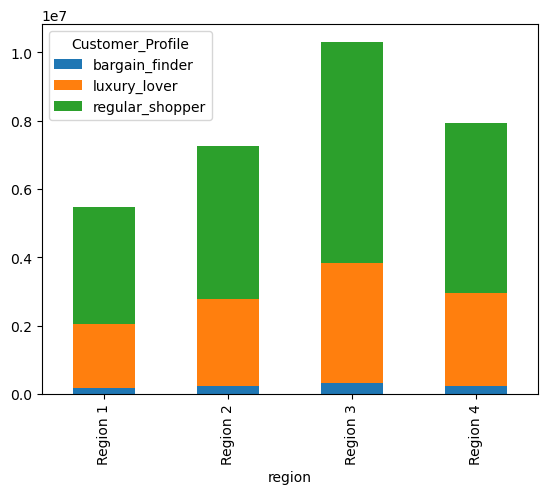

In [70]:
bar1=groupedbar.plot(kind='bar', stacked=True)

# Region 3 has the highest number of customers, which highlights more demand in this region in general. 

In [71]:
#export bar chart showing region
bar1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'custprofile_region.png'), bbox_inches='tight')


In [72]:
#bar chart of cust profile and department
groupedbar4 = df2.groupby(['department', 'Customer_Profile']).size().unstack(fill_value=0)

In [73]:
#sort by lux lover
sorted_groupedbar4 = groupedbar4.sort_values(by='luxury_lover', ascending=True)

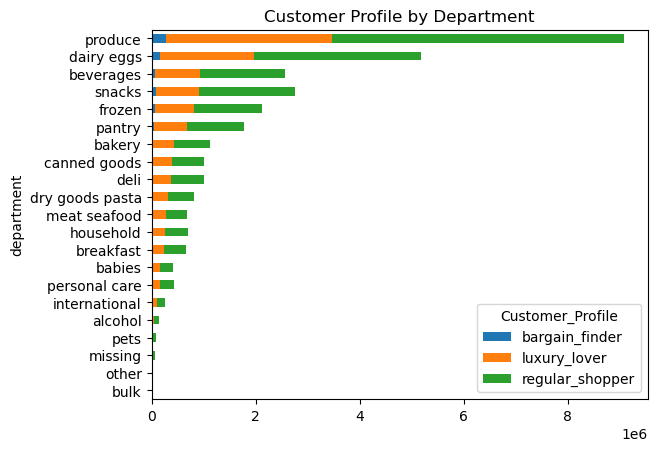

In [74]:
bar5test = sorted_groupedbar4.plot(kind='barh', stacked=True, title='Customer Profile by Department')


# The top 3 departments for 'luxury lovers' are produce, dairy eggs and beverages. 

In [75]:
#export bar chart sorted by lux shopper
bar5test.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'custprofile_departmentid_sortbylux.png'), bbox_inches='tight')

In [76]:
#sort by reg
sorted_groupedbar5 = groupedbar4.sort_values(by='regular_shopper', ascending=True)

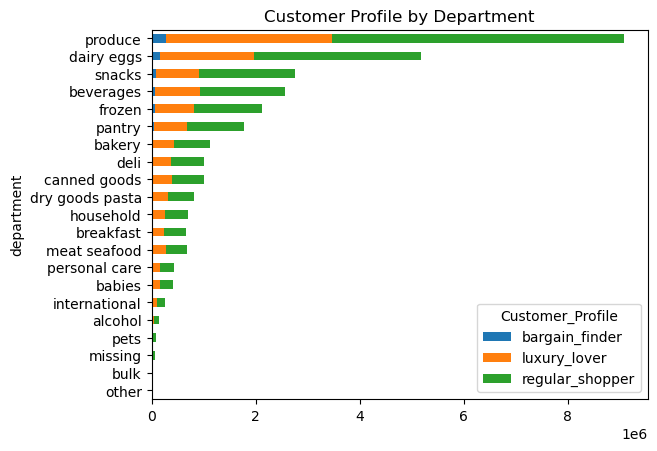

In [77]:
bar6=sorted_groupedbar5.plot(kind='barh', stacked=True, title='Customer Profile by Department')

# The top 3 departments for 'regular_shoppers' are produce, dairy eggs and snacks. This is similar for 'bargin_finders'.

In [78]:
#export bar chart sorted by reg shopper
bar6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'custprofile_departmentid_sortbyreg.png'), bbox_inches='tight')

In [79]:
dept_map = dict(zip(df2['department_id'], df2['department']))

In [80]:
dept_map

{7: 'beverages',
 16: 'dairy eggs',
 19: 'snacks',
 17: 'household',
 4: 'produce',
 14: 'breakfast',
 13: 'pantry',
 20: 'deli',
 1: 'frozen',
 11: 'personal care',
 12: 'meat seafood',
 6: 'international',
 3: 'bakery',
 15: 'canned goods',
 9: 'dry goods pasta',
 5: 'alcohol',
 8: 'pets',
 2: 'other',
 21: 'missing',
 18: 'babies',
 10: 'bulk'}

# Most popular day to shop for each customer profile

Text(0.5, 1.0, 'Most Popular Days by Customer Profile')

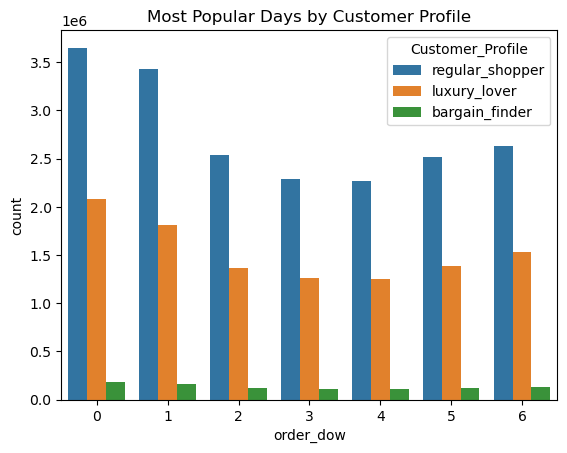

In [81]:
barchart10=sns.countplot(data=df2, x='order_dow', hue='Customer_Profile')
plt.title('Most Popular Days by Customer Profile')

# Friday, Saturday, Sunday are the most popular days for all customer profiles

In [82]:
barchart10.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'custprofile_dow.png'), bbox_inches='tight')

# How often users return to Instacart categorised by loyalty 

In [83]:
median_days_by_loyalty = df2.groupby('loyalty_flag')['days_since_prior_order'].median().reset_index()

In [84]:
median_days_by_loyalty

,loyalty_flag,days_since_prior_order
0,Loyal customer,5.0
1,New customer,16.0
2,Regular customer,9.0


Text(0.5, 1.0, 'Median Days Since Prior Order by Customer Loyalty Type')

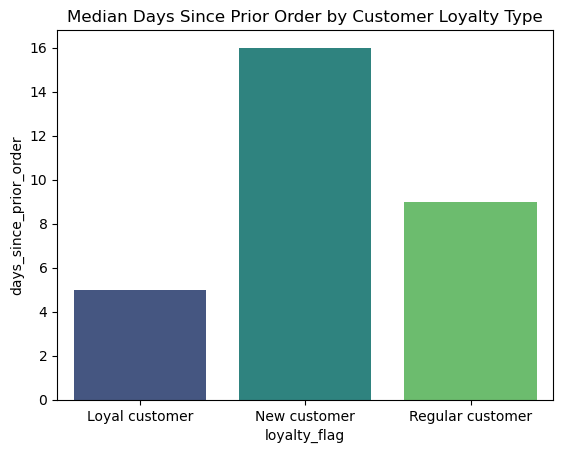

In [85]:
#plot bar
loyaltyflag_MDSPO= sns.barplot(x='loyalty_flag', y='days_since_prior_order', data=median_days_by_loyalty, palette='viridis')
#set title
loyaltyflag_MDSPO.set_title('Median Days Since Prior Order by Customer Loyalty Type')

# Loyal customers return to Instacart the most often. 

### Median days since prior order:
### Loyal customers : 5 days after prior order
### Regular customers : 9 days after prior order
### New customers : 16 days after prior order

In [ ]:
#export visualisation
loyaltyflag_MDSPO.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'mediandayssinceorder_loyalty.png'))

In [87]:
df2.shape

(30964564, 34)